In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Read in processed data
df = pd.read_csv('./data/data_processed.csv')
df.head()

,race,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,pt_lab_procedure_tot,pt_procedure_tot,pt_med_tot,pt_outp_tot,pt_inp_tot,pt_ER_tot,pt_diag_tot,past_readmits_lt30,past_readmits_gt30,past_readmits_none
0,Caucasian,0,1,41,0,1,0,0,0,1,...,41,0,1,0,0,0,1,0,0,1
1,Caucasian,1,3,59,0,18,0,0,0,9,...,59,0,18,0,0,0,9,0,1,0
2,AfricanAmerican,2,2,11,5,13,2,0,1,6,...,11,5,13,2,1,0,6,0,0,1
3,Caucasian,3,2,44,1,16,0,0,0,7,...,44,1,16,0,0,0,7,0,0,1
4,Caucasian,4,1,51,0,8,0,0,0,5,...,51,0,8,0,0,0,5,0,0,1


In [6]:
# Check the target column
print(df['readmitted'])
print('readmitted is column number ', df.columns.get_loc('readmitted'))

0         NO
1        >30
2         NO
3         NO
4         NO
        ... 
97103    >30
97104     NO
97105     NO
97106     NO
97107     NO
Name: readmitted, Length: 97108, dtype: object
readmitted is column number  20


Our initial goal was to predict for 30 day hospital readmissions, so we combine the values 'NO' and '>30' in the column 'readmitted' and relabel the value with the integer 0.
This is because there is no readmission for the patient in less than 30 days.

The value '<30' has been relabeled with the integer 1.

In [7]:
df.loc[df['readmitted'] == 'NO', 'readmitted'] = int(0)
#df.loc[df['readmitted'] == '>30', 'readmitted'] = int(0)
df.loc[(df['readmitted'] == '<30') | (df['readmitted'] == '>30'), 'readmitted'] = int(1)

# Make sure column values are integers, necessary for classification algorithms later
df['readmitted'] = df['readmitted'].astype('int')
print(df['readmitted'].dtype)

int64


In [8]:
# List all columns in dataset
df.columns 

Index(['race', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'diabetesMed',
       'readmitted', 'admission_urg_ind', 'admission_nurg_ind',
       'admission_none_ind', 'discharge_shortterm_ind',
       'discharge_longterm_ind', 'discharge_none_ind', 'admission_source_1',
       'admission_source_2', 'admission_source_3', 'caucasian_ind',
       'africanamerican_ind', 'hispanic_ind', 'asian_ind', 'otherrace_ind',
       'female_ind', 'male_ind', 'readmit_diag_1', 'readmit_diag_2',
       'readmit_diag_3', 'readmit_diag_4', 'readmit_diag_5', 'readmit_diag_6',
       'readmit_diag_7', 'readmit_diag_8', 'readmit_diag_9', 'readmit_diag_10',
       'readmit_diag_11', 'readmit_diag_12', 'readmit_diag_13',
       'pt_ris

In [9]:
# Single out which columns will be usede to predict readmit rate
features = ['age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'diabetesMed',
       'admission_urg_ind', 'admission_nurg_ind',
       'admission_none_ind', 'discharge_shortterm_ind',
       'discharge_longterm_ind', 'discharge_none_ind', 'admission_source_1',
       'admission_source_2', 'admission_source_3', 'caucasian_ind',
       'africanamerican_ind', 'hispanic_ind', 'asian_ind', 'otherrace_ind',
       'female_ind', 'male_ind', 'readmit_diag_1', 'readmit_diag_2',
       'readmit_diag_3', 'readmit_diag_4', 'readmit_diag_5', 'readmit_diag_6',
       'readmit_diag_7', 'readmit_diag_8', 'readmit_diag_9', 'readmit_diag_10',
       'readmit_diag_11', 'readmit_diag_12', 'readmit_diag_13',
       'pt_risk_diag_ct', 'pt_diag_ct', 'd_external_index',
       'd_supplementary_index', 'd_infect_ind', 'd_neoplasm_ind',
       'd_endocrine_ind', 'd_blood_ind', 'd_mental_ind', 'd_nervous_ind',
       'd_circulatory_ind', 'd_respiratory_ind', 'd_digestive_ind',
       'd_genitourinary_ind', 'd_pegnancy_ind', 'd_skin_ind', 'd_musculo_ind',
       'd_congenital_ind', 'd_perinatal_ind', 'd_symptoms_ind', 'd_injury_ind',
       'dia_med_change_ind', 'dia_med_nochange_ind', 'pt_admission_urg_ct',
       'admission_nurg_ct', 'admission_none_ct', 'pt_discharge_shortterm_ct',
       'pt_discharge_longterm_ct', 'pt_discharge_none_ct',
       'pt_admission_source_1_ct', 'pt_admission_source_2_ct',
       'pt_admission_source_3_ct', 'pt_time_tot', 'pt_lab_procedure_tot',
       'pt_procedure_tot', 'pt_med_tot', 'pt_outp_tot', 'pt_inp_tot',
       'pt_ER_tot', 'pt_diag_tot', 'past_readmits_lt30', 'past_readmits_gt30',
       'past_readmits_none']


In [10]:
from sklearn.model_selection import train_test_split

#Creating an additional column to stratify over 2 variables
df['strat_col'] = df['race'].astype(str) + "_" + df['readmitted'].astype(str)
train, test = train_test_split(df, test_size=.2, stratify=df['strat_col'], random_state=42)
train = train.drop(columns=['race','strat_col'])
test = test.drop(columns=['race','strat_col'])

We first use knn classification. On the training data, we perform a 5-fold split, and compute the accuracy and confusion matrices for the model at each split.

For knn, we begin with the hyperparameter 15.

In [11]:
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score,roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

n_splits = 5
current_split = 0
metrics={n:[] for n in range(0,n_splits)}

pipe = Pipeline([('scale', MinMaxScaler()), ('knn', KNeighborsClassifier(15))])

kfold = KFold(n_splits, shuffle = True)

for s_train, s_test in kfold.split(train):

    train_features = train.iloc[s_train][features]
    test_features = train.iloc[s_test][features]

    train_target = train.iloc[s_train]['readmitted']
    test_target = train.iloc[s_test]['readmitted']

    pipe.fit(train_features,train_target)
    metrics[current_split].append(accuracy_score(pipe.predict(test_features), test_target))
    metrics[current_split].append(confusion_matrix(pipe.predict(test_features), test_target))

    #probs = pipe.predict_proba(test_features)
    y_pred = pipe.predict(test_features)

    false_pos_rate, true_pos_rate, threshold = roc_curve(test_target, y_pred)

    #PRINTING ROC HERE
    print(auc(false_pos_rate, true_pos_rate))

    current_split += 1

for k in range(0,4):
    print('The accuracy of split ', k, ' is ', metrics[k][0], ' confusion is ', metrics[k][1])


0.677406748939398
0.6823378587347069
0.6850010230338589
0.6770633387116417
0.6804336517914904
The accuracy of split  0  is  0.6842579482558888  confusion is  [[6653 3406]
 [1500 3979]]
The accuracy of split  1  is  0.6900946128596254  confusion is  [[6726 3333]
 [1482 3996]]
The accuracy of split  2  is  0.6918967625667761  confusion is  [[6725 3361]
 [1426 4025]]
The accuracy of split  3  is  0.6832721889682692  confusion is  [[6652 3469]
 [1452 3964]]


Now we cross-validate to see if we can choose a better hyperparameter for imporving accuracy. For the kfold, we still do 5 splits.

From the results, it seems unlikey accuracy can be imporved beyond about 88% just by varying the hyperparametter.

In [12]:
%%time

n_splits = 5
kfold = KFold(n_splits, shuffle = True)

ave_accuracies = {k:[] for k in range(1,21)}

for k in range(1,21):

    pipe = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier(15))])
    accuracy = [] #Holds accuracy of model at each split, to be averaged later

    for s_train, s_test in kfold.split(train):

        train_features = train.iloc[s_train][features]
        test_features = train.iloc[s_test][features]

        train_target = train.iloc[s_train]['readmitted']
        test_target = train.iloc[s_test]['readmitted']

        pipe.fit(train_features, train_target)
        accuracy.append(accuracy_score(pipe.predict(test_features), test_target))

    ave_accuracies[k].append(sum(accuracy)/len(accuracy))
   

for k in ave_accuracies:
    print('When the knn parameter k is ', k, ', the average accuracy among the splits is ', ave_accuracies[k][0])


When the knn parameter k is  1 , the average accuracy among the splits is  0.7854697284919453
When the knn parameter k is  2 , the average accuracy among the splits is  0.7871173974543123
When the knn parameter k is  3 , the average accuracy among the splits is  0.7856370800777317
When the knn parameter k is  4 , the average accuracy among the splits is  0.78676984912377
When the knn parameter k is  5 , the average accuracy among the splits is  0.7862034492743761
When the knn parameter k is  6 , the average accuracy among the splits is  0.7856628582116558
When the knn parameter k is  7 , the average accuracy among the splits is  0.7866282491614216
When the knn parameter k is  8 , the average accuracy among the splits is  0.7864351558936293
When the knn parameter k is  9 , the average accuracy among the splits is  0.7867955121027701
When the knn parameter k is  10 , the average accuracy among the splits is  0.7868985616760619
When the knn parameter k is  11 , the average accuracy among 

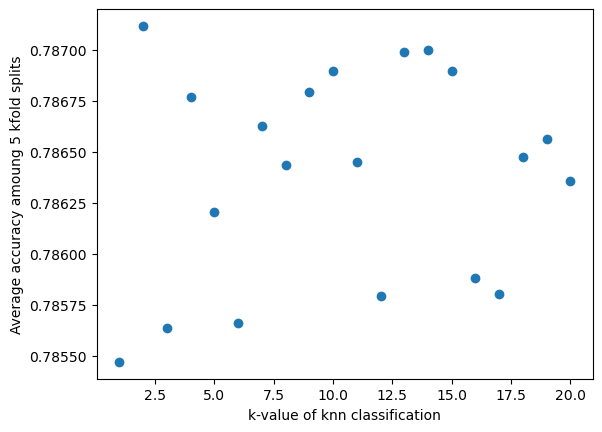

In [13]:
k_values = [n for n in range(1,21)]
acc = [ave_accuracies[n][0] for n in range(1,21)]
plt.scatter(k_values, acc)
plt.xlabel('k-value of knn classification')
plt.ylabel('Average accuracy amoung 5 kfold splits')
plt.show()
#I left this in for now, but with so little change in accuracy among different hyperparameter choices, this should probably be taken out.

Now we use xgboost to classify the readmits. We still use 5 splits in kfold.

We measure performance by computing accuracy and confusion matrix. By these metrics, xgboost is very simmilar to knn.

In [14]:
import xgboost as xgb

xgb_class = xgb.XGBClassifier(eval_metric='logloss')

n_splits = 5
current_split = 0
boost_metrics={n:[] for n in range(0,n_splits)}

for s_train, s_test in kfold.split(train):

    train_features = train.iloc[s_train][features]
    test_features = train.iloc[s_test][features]

    train_target = train.iloc[s_train]['readmitted']
    test_target = train.iloc[s_test]['readmitted']

    xgb_class.fit(train_features, train_target)
    boost_metrics[current_split].append(accuracy_score(xgb_class.predict(test_features), test_target))
    boost_metrics[current_split].append(confusion_matrix(xgb_class.predict(test_features), test_target))
    current_split += 1

    probs = xgb_class.predict_proba(test_features)
    y_pred = (probs[:,1]>=0.12)

    false_pos_rate, true_pos_rate, threshold = roc_curve(test_target, y_pred)
    print(auc(false_pos_rate, true_pos_rate))

for k in range(0,4):
    print('The accuracy of split ', k, ' is ', boost_metrics[k][0], ' confusion is ', boost_metrics[k][1])


0.9590645429874776
0.9596524832802554
0.9579956364673875
0.9596921570471212
0.9590651145381492
The accuracy of split  0  is  0.9658900759428498  confusion is  [[7842  209]
 [ 321 7166]]
The accuracy of split  1  is  0.9633133809615756  confusion is  [[7739  241]
 [ 329 7228]]
The accuracy of split  2  is  0.9640213683465276  confusion is  [[7864  201]
 [ 358 7114]]
The accuracy of split  3  is  0.9636995558988222  confusion is  [[7804  203]
 [ 361 7169]]
